In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing import image 
import keras
import cv2
from PIL import ImageFile
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd

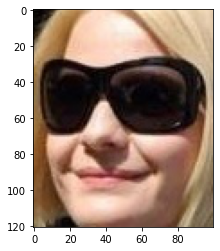

In [2]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
img = image.load_img("/Users/mehme/Datasets/Gender Classification Dataset/gender/train/female/0005.jpg")
plt.imshow(img)

cv2.imread("/Users/mehme/Datasets/Gender Classification Dataset/gender/train/female/0005.jpg").shape

train = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)


In [3]:
train_dataset = train.flow_from_directory("C:/Users/mehme/Datasets/Gender Classification Dataset/gender/train",
                                         target_size = (32,32),
                                            batch_size =3,
                                          class_mode =  "binary"
                                         )

test_dataset = test.flow_from_directory("C:/Users/mehme/Datasets/Gender Classification Dataset/gender/test",
                                         target_size = (32,32),
                                            batch_size =3,
                                          class_mode =  "binary"
                                         )


Found 3491 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [4]:
train_dataset.class_indices
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [5]:
test_dataset.class_indices
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [6]:
cnn = models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(2,2),
      
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(2,activation="softmax")
])


In [7]:
cnn.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history1 =cnn.fit(train_dataset,
       steps_per_epoch = 50,
       batch_size = 3,
       epochs = 100,
       validation_data = test_dataset

)  

Epoch 1/100
50/50 [==============================] - 0s 8ms/step - loss: 0.0865 - accuracy: 0.9799 - val_loss: 0.2055 - val_accuracy: 0.9450
Epoch 2/100
50/50 [==============================] - 0s 7ms/step - loss: 0.0529 - accuracy: 0.9867 - val_loss: 0.2380 - val_accuracy: 0.9350
Epoch 3/100
50/50 [==============================] - 0s 7ms/step - loss: 0.1276 - accuracy: 0.9600 - val_loss: 0.2385 - val_accuracy: 0.9200
Epoch 4/100
50/50 [==============================] - 0s 7ms/step - loss: 0.2485 - accuracy: 0.9200 - val_loss: 0.2069 - val_accuracy: 0.9150
Epoch 5/100
50/50 [==============================] - 0s 7ms/step - loss: 0.1778 - accuracy: 0.9200 - val_loss: 0.2135 - val_accuracy: 0.9100
Epoch 6/100
50/50 [==============================] - 0s 7ms/step - loss: 0.1572 - accuracy: 0.9667 - val_loss: 0.2918 - val_accuracy: 0.8850
Epoch 7/100
50/50 [==============================] - 0s 7ms/step - loss: 0.1459 - accuracy: 0.9200 - val_loss: 0.2781 - val_accuracy: 0.9050
Epoch 8/100
5

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                460864    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 461,890
Trainable params: 461,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
dosya = open("C:/Users/mehme/Datasets/Gender Classification Dataset/gender/deneme.txt","r",encoding="utf-8")
dizi = dosya.read().split('\n')

#ConfusionMatrix degerleri
tp = 0
tn = 0
fp = 0
fn = 0


for i in range(1, 101):
    
    path = 'C:/Users/mehme/Datasets/Gender Classification Dataset/gender/deneme/' + '('+ str(i) + ')' + '.jpg'
    test_image = image.load_img(path , target_size=(32, 32))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    train_dataset.class_indices
    if result[0][0] == 1:
        prediction = 'Kadın'
    else:
        prediction = 'Erkek'
    print(str(i)+ ".Deger : " + prediction + " - Gercek Deger : " + dizi[i] )
    if str(prediction) == 'Kadın' and str(dizi[i]) == 'Kadın':
        tp = tp + 1
    if str(prediction) == 'Erkek' and str(dizi[i]) == 'Erkek':
        tn = tn + 1
    if str(prediction) == 'Kadın' and str(dizi[i]) == 'Kadın':
        fp = fp + 1
    if str(prediction) == 'Kadın' and str(dizi[i]) == 'Kadın':
        fn = fn + 1
print('---------------------------------------------------------------------------------')
print("Confusion Matrix Sonuclari :")
print("")
print("TP : " + str(tp) + " TN : " + str(tn) + " FP : " + str(fp) + " FN : " + str(fn) )
print("Recall : " + str(tp/(tp+fn)))
print("Precision : " + str(tp/(tp+fp)))
print("Accuracy : " + str((tp+tn)/100))
print("F1 - Score : " + str((2*tp)/(2*tp+fp+fn)))
#tp-kadın kadın
#tn-erkek erkek
#fp-kadın erkek
#fn-erkek kadın

1.Deger : Kadın - Gercek Deger : Kadın
2.Deger : Kadın - Gercek Deger : Kadın
3.Deger : Kadın - Gercek Deger : Kadın
4.Deger : Kadın - Gercek Deger : Kadın
5.Deger : Kadın - Gercek Deger : Kadın
6.Deger : Kadın - Gercek Deger : Kadın
7.Deger : Kadın - Gercek Deger : Kadın
8.Deger : Kadın - Gercek Deger : Kadın
9.Deger : Kadın - Gercek Deger : Kadın
10.Deger : Kadın - Gercek Deger : Kadın
11.Deger : Kadın - Gercek Deger : Kadın
12.Deger : Kadın - Gercek Deger : Kadın
13.Deger : Kadın - Gercek Deger : Kadın
14.Deger : Kadın - Gercek Deger : Kadın
15.Deger : Kadın - Gercek Deger : Kadın
16.Deger : Kadın - Gercek Deger : Kadın
17.Deger : Erkek - Gercek Deger : Kadın
18.Deger : Kadın - Gercek Deger : Kadın
19.Deger : Kadın - Gercek Deger : Kadın
20.Deger : Kadın - Gercek Deger : Kadın
21.Deger : Kadın - Gercek Deger : Kadın
22.Deger : Kadın - Gercek Deger : Kadın
23.Deger : Kadın - Gercek Deger : Kadın
24.Deger : Erkek - Gercek Deger : Kadın
25.Deger : Kadın - Gercek Deger : Kadın
26.Deger 

<Figure size 432x288 with 0 Axes>

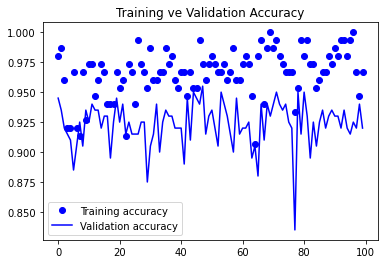

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training ve Validation Accuracy')
plt.legend()
plt.figure()